In [200]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency

In [201]:
data = pd.read_csv('data_preprocessed.csv')

In [202]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.707195,-0.701538,-1.017057,0.627343,-0.171386,1.351088,0.955242,1.410294,1.215747,0.450216,No
1,-0.707195,-0.701538,-1.017057,-2.009151,-1.206584,-1.300913,-1.855615,-0.004802,-0.007554,1.348449,No
2,-0.707195,-0.701538,0.983229,-1.786702,-1.534192,-0.965457,-0.669876,1.410294,-0.007554,-1.346251,No
3,-0.707195,-0.701538,-1.017057,0.823976,0.700991,-0.098335,0.288285,-0.004802,1.215747,0.450216,No
4,-0.707195,-0.701538,-1.017057,0.796750,1.268130,-0.269228,0.163701,-0.004802,-0.007554,2.246683,No


In [241]:
y = pd.DataFrame(data['10'])
X = data.drop(['10'],axis=1)

In [240]:
y.head()

,10
0,No
1,No
2,No
3,No
4,No


In [212]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.707195,-0.701538,-1.017057,0.627343,-0.171386,1.351088,0.955242,1.410294,1.215747,0.450216
1,-0.707195,-0.701538,-1.017057,-2.009151,-1.206584,-1.300913,-1.855615,-0.004802,-0.007554,1.348449
2,-0.707195,-0.701538,0.983229,-1.786702,-1.534192,-0.965457,-0.669876,1.410294,-0.007554,-1.346251
3,-0.707195,-0.701538,-1.017057,0.823976,0.700991,-0.098335,0.288285,-0.004802,1.215747,0.450216
4,-0.707195,-0.701538,-1.017057,0.796750,1.268130,-0.269228,0.163701,-0.004802,-0.007554,2.246683


In [259]:
X_original = X
y_original = y

In [260]:
X_o_train, X_o_test, y_o_train, y_o_test = train_test_split(X_original, y_original, test_size=0.4, random_state=100)

In [261]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_sample(X, y)
y.value_counts()

1    16953
0    16953
Name: 10, dtype: int64

In [213]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [244]:
y_train.value_counts()

10 
Yes    10227
No     10116
dtype: int64

In [216]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE()
#X_train, y_train = smote.fit_sample(X_train, y_train)
#y_train.value_counts()

10 
Yes    10191
No     10191
dtype: int64

In [ ]:
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=42)
 #fit predictor and target variable
#X_train, y_train = ros.fit_resample(X_train, y_train)
#y_train.value_counts()

In [ ]:
# oversampling with RandomOverSampler
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler()
#X_train, y_train = ros.fit_sample(X_train, y_train)

In [217]:
y_train.value_counts()

10 
Yes    10191
No     10191
dtype: int64

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
predictions = model.predict(X_test)
# r_squared = r2_score(y_test, predictions)
# mse = mean_squared_error(y_test, predictions)
# rmse = math.sqrt(mse)
# mae = mean_absolute_error(y_test, predictions)

0.7010985770109858


In [246]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
predictions = model.predict(X_test)
# r_squared = r2_score(y_test, predictions)
# mse = mean_squared_error(y_test, predictions)
# rmse = math.sqrt(mse)
# mae = mean_absolute_error(y_test, predictions)

0.8866769888667699


In [ ]:
#scores = []
#for i in range(1,40,1):
   # model = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    #model.fit(X_train, y_train)
   # scores.append(model.score(X_test, y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40,1),scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [230]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[6682,   80],
       [ 422,    7]], dtype=int64)

The accuracy of the model on test set is: 0.89 
[[5449 1388]
 [ 149 6577]]


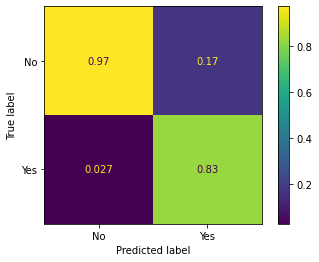

The Kappa of your model is: 0.77


In [247]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(model, X_test, y_test, normalize='pred')  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))

In [248]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [249]:
print(classifier.score(X_test, y_test))
predictions = classifier.predict(X_test)

0.89677799896778


The accuracy of the model on test set is: 0.90 
[[6043  794]
 [ 606 6120]]


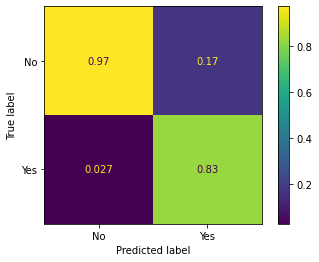

The Kappa of your model is: 0.79


In [250]:
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(model, X_test, y_test, normalize='pred')  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))

In [251]:
mapping = {
        'Yes': 1,
        'No': 0,
    }
y = y['10'].replace(mapping)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [253]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import f1_score
# load library
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# fit the predictor and target
rfc.fit(X_train, y_train)
# predict
rfc_predict = rfc.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict)) #should be as high as possible
print('Accuracy score:',accuracy_score(y_test, rfc_predict)) #R2
print('F1 score:',f1_score(y_test, rfc_predict)) #should be as high as possible

ROCAUC score: 0.9302972087256242
Accuracy score: 0.9301039593010396
F1 score: 0.9312046444121915


The accuracy of the model on test set is: 0.93 
[[6199  638]
 [ 310 6416]]


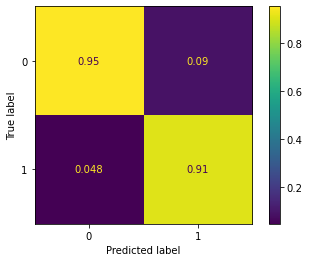

The Kappa of your model is: 0.86


In [255]:
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, rfc_predict))
print(confusion_matrix(y_test, rfc_predict))
plot_confusion_matrix(rfc, X_test, y_test, normalize='pred')  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, rfc_predict)))

In [262]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [263]:
print(classifier.score(X_o_test, y_o_test))
predictions = classifier.predict(X_o_test)

0.8978839489788395


The accuracy of the model on test set is: 0.90 
[[6072  765]
 [ 620 6106]]


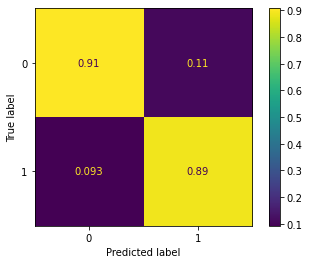

The Kappa of your model is: 0.80


In [265]:
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_o_test, predictions))
print(confusion_matrix(y_o_test, predictions))
plot_confusion_matrix(classifier, X_o_test, y_o_test, normalize='pred')  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_o_test, predictions)))

def firth_logit(X,y,num_iter=100,learning_rate=0.01):
    #Initialize weights
    weights = np.ones(X.shape[1])
    print (weights)
    #Define get_predictions function
    def get_predictions(X,weights):
        z = np.dot(X,weights)
        print (z)
        y_pred =  1/(1 + np.exp(-z))
        print (y_pred)
    #Perform gradient descent
    for i in range(num_iter):
        y_pred = get_predictions(X,weights)
        print (y_pred)
        #Calculate Fisher information matrix
        Xt = X.transpose()
        W = np.diag(y_pred*(1-y_pred))
        I = np.linalg.multi_dot([Xt,W,X])
        #Find diagonal of Hat Matrix
        sqrtW = W**0.5
        H = np.linalg.multi_dot([sqrtW,X,np.linalg.inv(I),Xt,sqrtW])
        hat_diag = np.diag(H)
        #Calculate U_star
        U_star = np.matmul((y -y_pred + hat_diag*(0.5 - y_pred)),X)
        #Update weights
        weights += np.matmul(np.linalg.inv(I),U_star)*learning_rate
        #Get final predictions
    y_pred =  get_predictions(X,weights)
    return y_pred